In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [2]:
rcParams['figure.figsize'] = 14,8
rcParams['axes.titlesize'] = 15
rcParams['font.size']=10
sns.set_style('whitegrid')

#show all columns in Jupyter Notebook
pd.set_option("display.max_columns", None)

In [4]:
inputs = pd.read_csv('inputs.csv',index_col=0)
df_Enthalpy = pd.read_csv('df_Enthalpy.csv',index_col=0)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(inputs.values,df_Enthalpy.values,test_size=0.2,random_state=101)

In [6]:
scaler = MinMaxScaler()

In [7]:
X_train = scaler.fit_transform(X_train)

In [8]:
X_test = scaler.transform(X_test)

In [9]:
X_train.shape

(36388, 37)

In [10]:
X_test.shape

(9097, 37)

In [11]:
model = Sequential()

model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(20))


model.compile(optimizer='adam',loss='mse')

In [12]:
# - Hyperparameter Tunning:

batchsize = 128
epochs = 400

In [13]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [14]:
model.fit(x=X_train,
        y=y_train,
        validation_data=(X_test,y_test),
        batch_size=batchsize,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop])

Epoch 1/400
285/285 [==============================] - 2s 4ms/step - loss: 169919.0938 - val_loss: 40452.7891
Epoch 2/400
285/285 [==============================] - 1s 3ms/step - loss: 33566.4453 - val_loss: 29349.7129
Epoch 3/400
285/285 [==============================] - 1s 3ms/step - loss: 28160.1289 - val_loss: 27290.1777
Epoch 4/400
285/285 [==============================] - 1s 3ms/step - loss: 26333.3047 - val_loss: 25336.2930
Epoch 5/400
285/285 [==============================] - 1s 3ms/step - loss: 24092.2285 - val_loss: 23029.5684
Epoch 6/400
285/285 [==============================] - 1s 3ms/step - loss: 21665.7324 - val_loss: 20873.2988
Epoch 7/400
285/285 [==============================] - 1s 3ms/step - loss: 19983.9727 - val_loss: 19775.7969
Epoch 8/400
285/285 [==============================] - 1s 3ms/step - loss: 18994.5859 - val_loss: 19311.3789
Epoch 9/400
285/285 [==============================] - 1s 4ms/step - loss: 18517.2148 - val_loss: 18849.0156
Epoch 10/400
285/2

In [15]:
losses = pd.DataFrame(model.history.history)

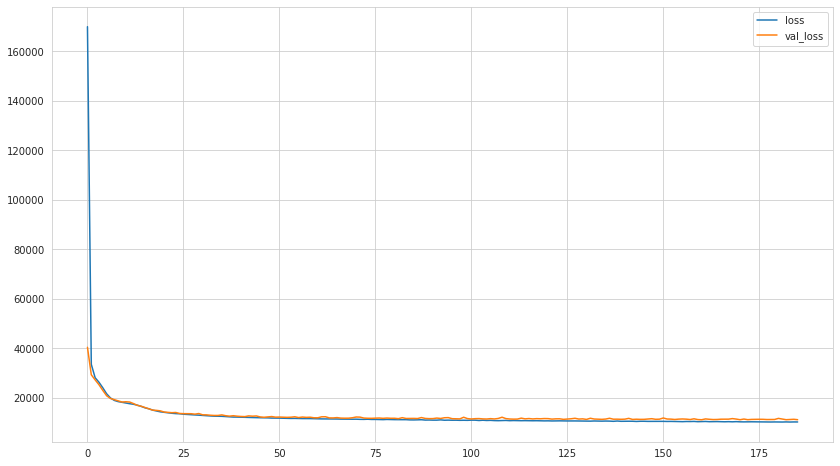

In [16]:
losses.plot()

In [17]:
def eval_metrics_timeseries(real_values,pred,name='Variable'):
    print(f"""
        ------- {name} ------
        
MAE: {mean_absolute_error(real_values,pred):.3f},
MSE: {mean_squared_error(real_values,pred):.3f},
RMSE: {np.sqrt(mean_squared_error(real_values,pred)):.3f},
Explained Variance Score: {explained_variance_score(real_values,pred)*100:.3f}%,

Compare Mean values per Year: Predictions VS Real:

{pd.concat([pd.DataFrame(real_values).mean(),pd.DataFrame(pred).mean()],axis=1,keys=['Avg real',' Avg Pred'],names='Year')}
    """)

In [18]:
predictions_enthalpy = model.predict(X_test)

285/285 [==============================] - 1s 1ms/step


In [19]:
eval_metrics_timeseries(y_test,predictions_enthalpy,name='Power Enthalpy (Kj/Kg)')


        ------- Power Enthalpy (Kj/Kg) ------
        
MAE: 68.364,
MSE: 11211.327,
RMSE: 105.884,
Explained Variance Score: 76.378%,

Compare Mean values per Year: Predictions VS Real:

Year    Avg real    Avg Pred
0     720.673024  719.532593
1     685.503591  686.211670
2     669.999661  671.599915
3     659.121084  661.051697
4     650.643491  652.674866
5     643.678181  645.790710
6     637.751328  639.945740
7     632.605190  634.865234
8     628.050429  630.393250
9     623.965584  626.258667
10    620.241453  622.611206
11    616.822240  619.285095
12    613.660062  616.241821
13    610.725212  613.382385
14    608.000128  610.756104
15    605.442206  608.410156
16    603.023039  605.962219
17    600.744027  603.853882
18    598.577764  601.731384
19    596.526776  599.653198
    


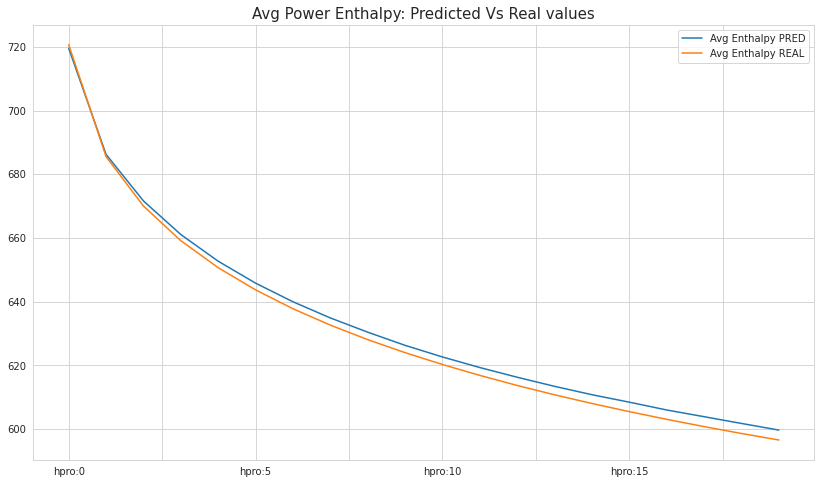

In [20]:
pd.DataFrame(predictions_enthalpy,columns=df_Enthalpy.columns).mean().plot(legend=True,label='Avg Enthalpy PRED',
                                                                           title='Avg Power Enthalpy: Predicted Vs Real values')
pd.DataFrame(y_test,columns=df_Enthalpy.columns).mean().plot(legend=True,label='Avg Enthalpy REAL')

##References:
###Utah FORGE Reports
###https://openei.org/wikiR%26D_Reports#Utah_FORGE_Well_58-32